# SBP Operators

In this example, we demonstrate how SBP operators can be accessed. We start by importing the necessary packages. 

In [1]:
using SummationByParts, LinearAlgebra
using SummationByParts.Cubature, SummationByParts.SymCubatures
using Latexify

[ Info: Precompiling SummationByParts [55d25451-638a-4804-8089-59924bcb4a40]
[ Info: Skipping precompilation since __precompile__(false). Importing SummationByParts [55d25451-638a-4804-8089-59924bcb4a40].


WebIO._IJuliaInit()

## 1D Operators

### LGL Operators

In [2]:
T = Float64

Float64

In [3]:
p = 3; # degree of the SBP operator

In [4]:
oper_lgl = getLineSegSBPLobbato(degree=p)

LineSegSBP{Float64}(3, 4, LineSymCub{Float64}(1, 2, 4, true, false, 1, [0, 2], [0.7236067977499789], [0.16666666666666666, 0.8333333333333334]), [-1.0; 1.0;;], [0.16666666666666666, 0.16666666666666666, 0.8333333333333334, 0.8333333333333334], [-0.5000000000000004 0.08333333333333322 0.6741808286457893 -0.25751416197912314; -0.08333333333333322 0.5000000000000004 0.2575141619791228 -0.6741808286457891; -0.6741808286457893 -0.2575141619791228 0.0 0.9316949906249126; 0.25751416197912314 0.6741808286457891 -0.9316949906249126 0.0;;;], [-1.0000000000000009 0.0 0.0 0.0; 0.0 1.0000000000000009 0.0 0.0; 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0;;;])

The SBP operators $\sf Q$, $\sf H$, $\sf D$, $\sf E$, and $\sf S$ can be obtained as:

In [5]:
Q = oper_lgl.Q;
Qx = Q[:,:,1];
latexify(Qx)

L"\begin{equation}
\left[
\begin{array}{cccc}
-0.5000000000000004 & 0.08333333333333322 & 0.6741808286457893 & -0.25751416197912314 \\
-0.08333333333333322 & 0.5000000000000004 & 0.2575141619791228 & -0.6741808286457891 \\
-0.6741808286457893 & -0.2575141619791228 & 0.0 & 0.9316949906249126 \\
0.25751416197912314 & 0.6741808286457891 & -0.9316949906249126 & 0.0 \\
\end{array}
\right]
\end{equation}
"

In [6]:
H = diagm(oper_lgl.w);
latexify(H)

L"\begin{equation}
\left[
\begin{array}{cccc}
0.16666666666666666 & 0.0 & 0.0 & 0.0 \\
0.0 & 0.16666666666666666 & 0.0 & 0.0 \\
0.0 & 0.0 & 0.8333333333333334 & 0.0 \\
0.0 & 0.0 & 0.0 & 0.8333333333333334 \\
\end{array}
\right]
\end{equation}
"

To find the boundary operator, we proceed as:

In [7]:
E = oper_lgl.E;
Ex = E[:,:,1];
latexify(E)

L"\begin{equation}
\left[
\begin{array}{cccc}
-1.0000000000000009 & 0.0 & 0.0 & 0.0 \\
0.0 & 1.0000000000000009 & 0.0 & 0.0 \\
0.0 & 0.0 & 0.0 & 0.0 \\
0.0 & 0.0 & 0.0 & 0.0 \\
\end{array}
\right]
\end{equation}
"

$\sf S$ and $\sf D$ are computed using the formulas $${\sf D} = {\sf H}^{-1}{\sf Q}$$ $${\sf S} = {\sf Q} - \frac{1}{2}{\sf E}$$

In [8]:
Dx = inv(H)*Q[:,:,1];
latexify(Dx)

L"\begin{equation}
\left[
\begin{array}{cccc}
-3.0000000000000027 & 0.49999999999999933 & 4.045084971874736 & -1.5450849718747388 \\
-0.49999999999999933 & 3.0000000000000027 & 1.5450849718747368 & -4.045084971874735 \\
-0.8090169943749471 & -0.30901699437494734 & 0.0 & 1.1180339887498951 \\
0.30901699437494773 & 0.8090169943749469 & -1.1180339887498951 & 0.0 \\
\end{array}
\right]
\end{equation}
"

In [9]:
Sx = Qx - 0.5.*Ex;
latexify(Sx)

L"\begin{equation}
\left[
\begin{array}{cccc}
0.0 & 0.08333333333333322 & 0.6741808286457893 & -0.25751416197912314 \\
-0.08333333333333322 & 0.0 & 0.2575141619791228 & -0.6741808286457891 \\
-0.6741808286457893 & -0.2575141619791228 & 0.0 & 0.9316949906249126 \\
0.25751416197912314 & 0.6741808286457891 & -0.9316949906249126 & 0.0 \\
\end{array}
\right]
\end{equation}
"

Check if the SBP property is satisfied, i.e., $\sf Q+Q^{T}=E$

In [10]:
norm(Qx+Qx'-Ex)

0.0

### LG Operators

The same can be done for the LG operators.

In [11]:
oper_lg = getLineSegSBPLegendre(degree=p);

In [12]:
Qx = oper_lg.Q[:,:,1];
H = diagm(oper_lg.w);
Ex = oper_lg.E[:,:,1];
Dx = inv(H)*Q[:,:,1];
Sx = Qx - 0.5.*Ex;

In [13]:
latexify(Qx)

L"\begin{equation}
\left[
\begin{array}{cccc}
1.1590524262142838 & -0.20197432186638253 & -1.6906282616122876 & 0.7335501572643874 \\
0.20197432186638253 & -1.1590524262142838 & -0.7335501572643869 & 1.6906282616122872 \\
0.4940375280205468 & 0.21435895436195518 & 0.25069398334779636 & -0.9590904657302988 \\
-0.2143589543619558 & -0.4940375280205461 & 0.9590904657302988 & -0.25069398334779636 \\
\end{array}
\right]
\end{equation}
"

In [14]:
latexify(H)

L"\begin{equation}
\left[
\begin{array}{cccc}
0.3478548451374538 & 0.0 & 0.0 & 0.0 \\
0.0 & 0.3478548451374538 & 0.0 & 0.0 \\
0.0 & 0.0 & 0.652145154862546 & 0.0 \\
0.0 & 0.0 & 0.0 & 0.652145154862546 \\
\end{array}
\right]
\end{equation}
"

In [15]:
latexify(Ex)

L"\begin{equation}
\left[
\begin{array}{cccc}
2.3181048524285677 & 0.0 & -1.196590733591741 & 0.5191912029024317 \\
0.0 & -2.3181048524285677 & -0.5191912029024317 & 1.196590733591741 \\
-1.196590733591741 & -0.5191912029024317 & 0.5013879666955927 & 0.0 \\
0.5191912029024317 & 1.196590733591741 & 0.0 & -0.5013879666955927 \\
\end{array}
\right]
\end{equation}
"

In [16]:
latexify(Dx)

L"\begin{equation}
\left[
\begin{array}{cccc}
-1.4373811576562256 & 0.23956352627603705 & 1.9381096398970346 & -0.740292008516849 \\
-0.23956352627603705 & 1.4373811576562256 & 0.740292008516848 & -1.9381096398970339 \\
-1.0337895231129761 & -0.3948724606156119 & 0.0 & 1.4286619837285885 \\
0.3948724606156124 & 1.0337895231129757 & -1.4286619837285885 & 0.0 \\
\end{array}
\right]
\end{equation}
"

In [17]:
latexify(Sx)

L"\begin{equation}
\left[
\begin{array}{cccc}
0.0 & -0.20197432186638253 & -1.0923328948164173 & 0.4739545558131716 \\
0.20197432186638253 & 0.0 & -0.47395455581317103 & 1.0923328948164168 \\
1.0923328948164173 & 0.47395455581317103 & 0.0 & -0.9590904657302988 \\
-0.47395455581317164 & -1.0923328948164166 & 0.9590904657302988 & 0.0 \\
\end{array}
\right]
\end{equation}
"

Check if the SBP property is satisfied.

In [18]:
norm(Qx+Qx'-Ex)

4.440892098500626e-16

## 2D Operators

2D operators of the following range of degrees are currently available. 

SBP diagonal-$\sf E$: $p=\{1,\dots,10\}$ 

SBP-$\sf \Omega$ and SBP-$\sf \Gamma$: $p=\{1,\dots,4\}$

In [19]:
p = 3

3

For SBP diagonal-E operators, we must also specify whether the LGL or LG type facet quadrature should be used. We can also specify the quadrature accuracy to $q = 2p-1$ or $q = 2p$. 

In [20]:
q = 2*p - 1;
lgl = true;
lg = false;

In [21]:
oper_tri = SummationByParts.getTriSBPDiagE(degree=p,vertices=lgl,quad_degree=q)
# oper_tri = SummationByParts.getTriSBPOmega(degree=p)
# oper_tri = SummationByParts.getTriSBPGamma(degree=p)

TriSBP{Float64}(3, 15, TriSymCub{Float64}(2, 4, 15, true, true, false, 1, 1, 0, [0, 3, 1], [0.41469035132718185, 0.8273268353539885], [0.014698618394803228, 0.09752600361864236, 0.44155411568082115, 0.056443964486199594]), [-1.0 -1.0; 1.0 -1.0; -1.0 1.0], [0.014698618394803228, 0.014698618394803228, 0.014698618394803228, 0.09752600361864236, 0.09752600361864236, 0.09752600361864236, 0.44155411568082115, 0.44155411568082115, 0.44155411568082115, 0.056443964486199594, 0.056443964486199594, 0.056443964486199594, 0.056443964486199594, 0.056443964486199594, 0.056443964486199594], [-0.05000000000000003 -0.0023671950822501935 … 0.005536259493918755 -0.021126252595218414; 0.0023671950822501935 0.04999999999999992 … 0.0006021747554100543 -0.0011050478459260146; … ; -0.005536259493918599 -0.0006021747554100543 … -0.27222222222222253 0.019007663904927096; 0.021126252595218296 0.0011050478459260146 … -0.01900766390493026 -0.2722222222222221;;; -0.04999999999999992 -0.0011835975411251347 … 0.010615

We can now access the operators as:

In [22]:
Qx = oper_tri.Q[:,:,1];
Qy = oper_tri.Q[:,:,2];
H = diagm(oper_tri.w);
Ex = oper_tri.E[:,:,1];
Ey = oper_tri.E[:,:,2];
Dx = inv(H)*Qx;
Dy = inv(H)*Qy;
Sx = Qx - 0.5.*Ex;
Sy = Qy - 0.5.*Ey;

In [23]:
latexify(Qx)

"\\begin{equation}\n\\left[\n\\begin{array}{ccccccccccccccc}\n-0.05000000000000003 & -0.0023671950822501935 & -0.0011835975411251356 & -0.016745257556144977 & 0.01143686139154244 & 0.0025008918425175725 & -0.01695994058081973 & 0.03740063347561936 & -0.020440692894799092 & 0.0" ⋯ 4646 bytes ⋯ "00326 & 0.043323062987490536 & -0.0581114315473547 & 0.30070900282950375 & -0.08237786884071253 & 0.02287033558675903 & 0.0042135233603134235 & 0.019404978787133327 & 0.01650043076010808 & -0.01900766390493026 & -0.2722222222222221 \\\\\n\\end{array}\n\\right]\n\\end{equation}\n"

In [24]:
latexify(Qy)

"\\begin{equation}\n\\left[\n\\begin{array}{ccccccccccccccc}\n-0.04999999999999992 & -0.0011835975411251347 & -0.0023671950822503 & 0.0025008918425169584 & 0.011436861391542218 & -0.01674525755614478 & -0.020440692894798725 & 0.037400633475619616 & -0.016959940580820315 & -0.0" ⋯ 4653 bytes ⋯ "611947483688355 & 0.09220143557442885 & 0.0002681099876330006 & 0.010654898984059014 & -0.010923008971691604 & -0.022870335586758585 & -0.012286907399794681 & 0.009702489393566393 & 0.004213523360313642 & -0.03801532780985657 & 0.0 \\\\\n\\end{array}\n\\right]\n\\end{equation}\n"

In [25]:
latexify(H)

"\\begin{equation}\n\\left[\n\\begin{array}{ccccccccccccccc}\n0.014698618394803228 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 \\\\\n0.0 & 0.014698618394803228 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 \\\\" ⋯ 1164 bytes ⋯ "594 & 0.0 & 0.0 \\\\\n0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.056443964486199594 & 0.0 \\\\\n0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.056443964486199594 \\\\\n\\end{array}\n\\right]\n\\end{equation}\n"

In [26]:
latexify(Ex)

"\\begin{equation}\n\\left[\n\\begin{array}{ccccccccccccccc}\n-0.10000000000000006 & 0.0 & -1.1004881868188319e-16 & 0.0 & 0.0 & 3.049006850778657e-16 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 1.5550416278483793e-16 & -1.1596738612628503e-16 \\\\\n0.0 & 0.09999999999999984 & 1." ⋯ 1809 bytes ⋯ "0.0 & -0.5444444444444451 & -3.161754804529057e-15 \\\\\n-1.15967386126285e-16 & 0.0 & 1.156156937812517e-16 & 0.0 & 0.0 & 2.9871219474021276e-15 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & -3.161754804529057e-15 & -0.5444444444444442 \\\\\n\\end{array}\n\\right]\n\\end{equation}\n"

In [27]:
latexify(Ey)

"\\begin{equation}\n\\left[\n\\begin{array}{ccccccccccccccc}\n-0.09999999999999984 & -1.1004881868188319e-16 & 0.0 & 1.63748860653457e-17 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & -7.227785321674431e-17 & 1.1561569378125172e-16 & 0.0 & 0.0 & 0.0 & 0.0 \\\\\n-1.1004881868188319e-16 & -2.220" ⋯ 1810 bytes ⋯ "754804529057e-15 & 0.5444444444444442 & 0.0 & 0.0 \\\\\n0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 \\\\\n0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 \\\\\n\\end{array}\n\\right]\n\\end{equation}\n"

In [28]:
latexify(Dx)

"\\begin{equation}\n\\left[\n\\begin{array}{ccccccccccccccc}\n-3.401680257083059 & -0.16104881551909173 & -0.08052440775954851 & -1.139240240570185 & 0.7780909119721076 & 0.17014468811584194 & -1.1538459007015245 & 2.544499929928281 & -1.39065402922672 & 4.138466134629477 & 0." ⋯ 4404 bytes ⋯ "739486704868837 & 0.7675411070404686 & -1.029541990473805 & 5.327567005025423 & -1.4594628423177771 & 0.40518655617024857 & 0.07464967067193905 & 0.34379191759072475 & 0.29233295198714104 & -0.33675281454720607 & -4.822875655532306 \\\\\n\\end{array}\n\\right]\n\\end{equation}\n"

In [29]:
latexify(Dy)

"\\begin{equation}\n\\left[\n\\begin{array}{ccccccccccccccc}\n-3.4016802570830516 & -0.08052440775954844 & -0.161048815519099 & 0.17014468811580014 & 0.7780909119720925 & -1.1392402405701716 & -1.390654029226695 & 2.5444999299282984 & -1.1538459007015645 & -1.4372951271860854 " ⋯ 4403 bytes ⋯ "44 & -0.08170842579308836 & 1.6335038903401595 & 0.0047500204862213884 & 0.18876950053117034 & -0.19351952101738443 & -0.4051865561702407 & -0.2176832813152024 & 0.17189595879535757 & 0.07464967067194292 & -0.6735056290943422 & 0.0 \\\\\n\\end{array}\n\\right]\n\\end{equation}\n"

In [30]:
latexify(Sx)

"\\begin{equation}\n\\left[\n\\begin{array}{ccccccccccccccc}\n0.0 & -0.0023671950822501935 & -0.0011835975411250805 & -0.016745257556144977 & 0.01143686139154244 & 0.00250089184251742 & -0.01695994058081973 & 0.03740063347561936 & -0.020440692894799092 & 0.06082973445273505 & " ⋯ 4496 bytes ⋯ " 0.01546274902800326 & 0.043323062987489044 & -0.0581114315473547 & 0.30070900282950375 & -0.08237786884071253 & 0.02287033558675903 & 0.0042135233603134235 & 0.019404978787133327 & 0.01650043076010808 & -0.019007663904928678 & 0.0 \\\\\n\\end{array}\n\\right]\n\\end{equation}\n"

In [31]:
latexify(Sy)

"\\begin{equation}\n\\left[\n\\begin{array}{ccccccccccccccc}\n0.0 & -0.0011835975411250796 & -0.0023671950822503 & 0.00250089184251695 & 0.011436861391542218 & -0.01674525755614478 & -0.020440692894798725 & 0.037400633475619616 & -0.016959940580820315 & -0.021126252595218407 &" ⋯ 4500 bytes ⋯ "611947483688355 & 0.09220143557442885 & 0.0002681099876330006 & 0.010654898984059014 & -0.010923008971691604 & -0.022870335586758585 & -0.012286907399794681 & 0.009702489393566393 & 0.004213523360313642 & -0.03801532780985657 & 0.0 \\\\\n\\end{array}\n\\right]\n\\end{equation}\n"

Check if the SBP property is satisfied.

In [32]:
norm(Qx+Qx' - Ex)

2.2126799233656878e-17

In [33]:
norm(Qy+Qy' - Ey)

2.2126799233656878e-17

We may also plot the SBP nodes.

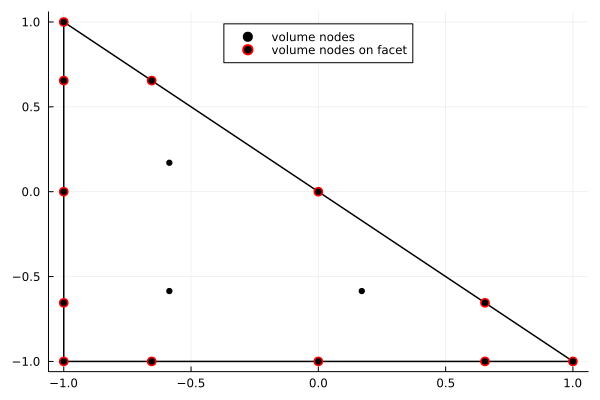

In [34]:
xy = SymCubatures.calcnodes(oper_tri.cub, oper_tri.vtx);
plot_tri_nodes(x=xy)

## 3D Operators


3D operators of the following range of degrees are currently available. 

SBP diagonal-$\sf E$: $p=\{1,\dots,5\}$ 

SBP-$\sf \Omega$ and SBP-$\sf \Gamma$: $p=\{1,\dots,4\}$

In [35]:
p = 3;
q = 2*p-1; # For SBP-Omega and SBP-Gamma, q=2p by default.
faceoper =:DiagE; #Facet operator type for SBP diagonal-E. It can either be SBP diagonal-E or SBP-Omega type (on the facet triangles).

In [36]:
oper_tet = SummationByParts.getTetSBPDiagE(degree=p, faceopertype=faceoper, cubdegree=q)
# oper_tet = SummationByParts.getTetSBPOmega(degree=p)
# oper_tet = SummationByParts.getTetSBPGamma(degree=p)

TetSBP{Float64}(3, 44, TetSymCub{Float64}(4, 5, 44, true, false, false, false, 1, 2, 0, 1, 0, 0, 0, [0, 2, 0, 3, 0], [0.5008941915142769, 0.8506802519794945, 0.23722737279318576, 0.3077459416259917], [0.0015673886232196292, 0.17081759879508043, 0.033441261076507856, 0.01477813407660693, 0.00543005348522964]), [-1.0 -1.0 -1.0; 1.0 -1.0 -1.0; -1.0 1.0 -1.0; -1.0 -1.0 1.0], [0.0015673886232196292, 0.0015673886232196292, 0.0015673886232196292, 0.0015673886232196292, 0.17081759879508043, 0.17081759879508043, 0.17081759879508043, 0.17081759879508043, 0.033441261076507856, 0.033441261076507856  …  0.00543005348522964, 0.00543005348522964, 0.00543005348522964, 0.00543005348522964, 0.00543005348522964, 0.00543005348522964, 0.00543005348522964, 0.00543005348522964, 0.00543005348522964, 0.00543005348522964], [-0.007130359307204485 -0.00013902063300634928 … -0.0005333368972286347 -0.0005333368972286496; 0.00013902063300634928 0.007130359307204485 … 0.0005333368972286284 0.0005333368972286013; … ; 

In [37]:
Qx = oper_tet.Q[:,:,1];
Qy = oper_tet.Q[:,:,2];
Qz = oper_tet.Q[:,:,3];
H = diagm(oper_tet.w);
Ex = oper_tet.E[:,:,1];
Ey = oper_tet.E[:,:,2];
Ez = oper_tet.E[:,:,3];
Dx = inv(H)*Qx;
Dy = inv(H)*Qy;
Dz = inv(H)*Qz;
Sx = Qx - 0.5.*Ex;
Sy = Qy - 0.5.*Ey;
Sz = Qz - 0.5.*Ez;

Test if the SBP property is satisfied. 

In [38]:
norm(Qx+Qx' - Ex)

0.0

In [39]:
norm(Qy+Qy' - Ey)

0.0

In [40]:
norm(Qz+Qz' - Ez)

0.0

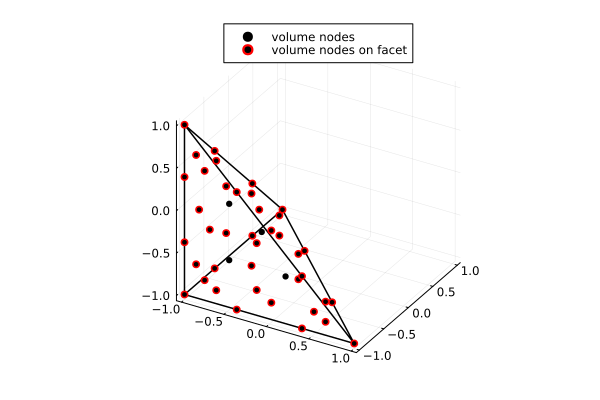

In [41]:
xyz = SymCubatures.calcnodes(oper_tet.cub, oper_tet.vtx);
plot_tet_nodes(x=xyz)

The facet quadrature rules (on the reference triangle) can then be obtained as

In [42]:
qf = 2*p # the facet quadrature must be degree 2p accuracte
cub_tet_facet, vtx_tet_facet = SummationByParts.getTriCubatureForTetFaceDiagE(qf, faceopertype=faceoper)
# cub_tet_facet, vtx_tet_facet = SummationByParts.getTriCubatureOmega(qf) # for SBP-Omega and SBP-Gamma operators

(TriSymCub{Float64}(3, 4, 15, true, false, false, 1, 2, 0, [0, 3, 1], [0.8506802519794945, 0.23722737279318576, 0.3077459416259917], [0.01426071861440897, 0.3303589772911334, 0.20376930605390392, 0.059138832353610636]), [-1.0 -1.0; 1.0 -1.0; -1.0 1.0])

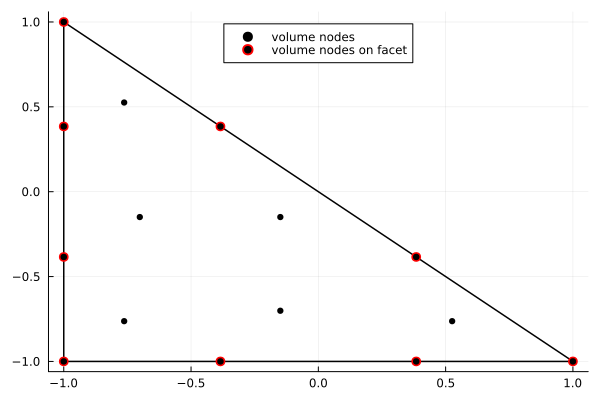

In [43]:
xy_facet = SymCubatures.calcnodes(cub_tet_facet, vtx_tet_facet);
plot_tri_nodes(x=xy_facet)